## Aayush Raj 19A1HP069

In [1]:
import pandas as pd #loading files as Data frames, data manipulation and analysis
import numpy as np #Basic tools to compute and manipulate arrays

In [2]:
ad_df = pd.read_csv( r"Advertising.csv") #importing the csv dataset

In [3]:
ad_df.head(10) #display first 10 rows

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6
5,6,8.7,48.9,75.0,Weekdays,5.9
6,7,57.5,32.8,23.5,Weekdays,14.4
7,8,120.2,19.6,11.6,Weekdays,6.6
8,9,8.6,2.1,1.0,Weekdays,19.6
9,10,199.8,2.6,21.2,Weekdays,13.4


In [4]:
ad_df.info() #To get details about the variable and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


### Removing missing value rows

In [7]:
ad_df.isnull().values.any() #there are some null values in this dataset

True

In [8]:
ad_df = ad_df.dropna() #Remove missing value rows

In [9]:
ad_df.info() #Deleted 3 rows of Sno and Sales and 2 rows od TV, Radio, Newspaper, Day whose values were missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [11]:
ad_df['Day'] = ad_df['Day'].astype(str)

In [12]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


### Encoding the categorical variable

In [13]:
ad_df['Day'].unique()

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [14]:
pd.get_dummies(ad_df['Day'])[0:5]

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [15]:
categorical_features = ['Day']

In [16]:
X_features = ['TV', 'Radio', 'Newspaper', 'Day']

In [17]:
ad_encoded_df = pd.get_dummies( ad_df[X_features], columns = categorical_features, drop_first = True )

In [18]:
ad_encoded_df.columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

In [19]:
X_features = ad_encoded_df.columns

In [20]:
X_features

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

### DESCRIPTIVE SUMMARY

In [21]:
ad_df[["TV", "Radio","Newspaper","Sales"]].describe()

,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,14.102030
std,85.439138,14.922793,20.972370,5.192302
min,0.700000,0.000000,0.300000,1.600000
25%,74.700000,9.900000,12.900000,10.400000
50%,149.700000,22.300000,25.900000,12.900000
75%,218.400000,36.500000,45.100000,17.400000
max,296.400000,49.600000,100.900000,27.000000


In [22]:
ad_encoded_df.describe()

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,0.766497,0.213198
std,85.439138,14.922793,20.972370,0.424137,0.410610
min,0.700000,0.000000,0.300000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,1.000000,0.000000
max,296.400000,49.600000,100.900000,1.000000,1.000000


### Visualization

In [23]:
get_ipython().magic('matplotlib inline')
import seaborn as sn
import matplotlib.pyplot as plt

In [25]:
ad_df.corr()

,Sno,TV,Radio,Newspaper,Sales
Sno,1.000000,0.023044,-0.102923,-0.143636,0.006161
TV,0.023044,1.000000,0.055658,0.095794,0.047781
Radio,-0.102923,0.055658,1.000000,0.356668,0.001630
Newspaper,-0.143636,0.095794,0.356668,1.000000,-0.027103
Sales,0.006161,0.047781,0.001630,-0.027103,1.000000


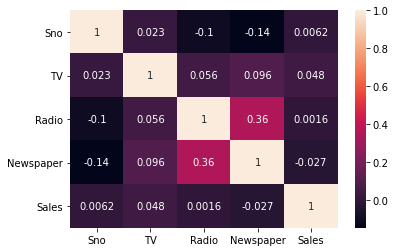

In [26]:
sn.heatmap( ad_df.corr(), annot = True )

In [27]:
ad_encoded_df.corr()

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
TV,1.000000,0.055658,0.095794,-0.701157,0.661571
Radio,0.055658,1.000000,0.356668,0.001294,-0.004410
Newspaper,0.095794,0.356668,1.000000,-0.121552,0.097357
Day_Weekdays,-0.701157,0.001294,-0.121552,1.000000,-0.943123
Day_Weekend,0.661571,-0.004410,0.097357,-0.943123,1.000000


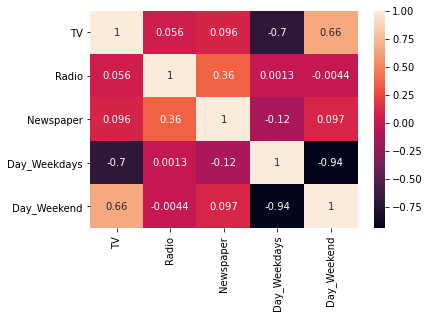

In [28]:
sn.heatmap( ad_encoded_df.corr(), annot = True ) ## There is no auto correlation in these variables.

In [29]:
daysales = ad_df.groupby('Day')['Sales'].mean().reset_index()

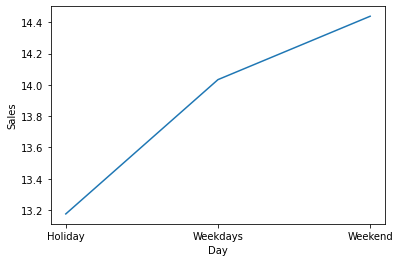

In [30]:
sn.lineplot( x = 'Day', y = 'Sales', data = daysales )

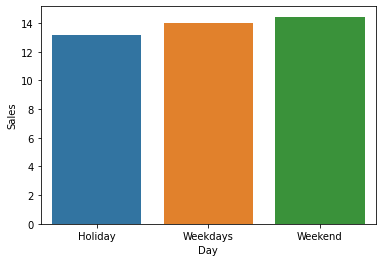

In [31]:
sn.barplot( x = 'Day', y = 'Sales', data = daysales )

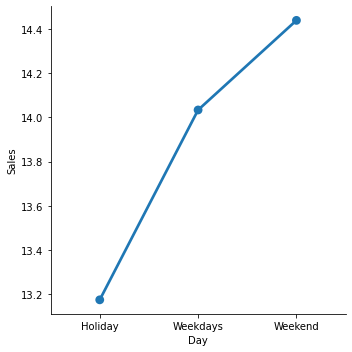

In [33]:
sn.catplot( x = 'Day', y = 'Sales', kind = 'point', data = daysales, height = 5 )
#The Day Varible is an important for sale and sales are low on weekends and on holiday, as most people are free and willing to buy on weekdays rather than on holiday.

### Splitting the dataset

In [34]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant(ad_encoded_df ) #Assigning inpependent variables
Y = ad_df['Sales'] #Assigning dependent variables
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 67 ) #Spliting data into train and test

### training the data

In [48]:
ad_train_1 = sm.OLS(train_y, train_X).fit()
ad_train_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.026  
Dependent Variable: Sales            AIC:                980.9494
Date:               2020-08-12 20:38 BIC:                999.2869
No. Observations:   157              Log-Likelihood:     -484.47 
Df Model:           5                F-statistic:        0.2055  
Df Residuals:       151              Prob (F-statistic): 0.960   
R-squared:          0.007            Scale:              29.158  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         12.3486    3.4089   3.6225  0.0004   5.6133  19.0838
TV             0.0038    0.0073   0.5262  0.5995  -0.0105   0.0182
Radio          0.0095    0.0314   0.3044  0.7612  -0.0524   0.0715
Newspaper     -0.0088    0.0224  -0.3934  0.6945  -0.0532   0.0355
Day_Weekdays   1.3771    2.9567   0.4657  0.6421  -4.4649   7.2190
Day_Weekend    1.4940    2.8524   0.5238  0.6012  -4.1418   7.1298
-----------------------------------------------------------------
Omnibus:              9.081        Durbin-Watson:           2.209
Prob(Omnibus):        0.011        Jarque-Bera (JB):        7.837
Skew:                 0.465        Prob(JB):                0.020
Kurtosis:             2.424        Condition No.:           2056 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### Multi Collinearity - VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X.as_matrix()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range(X_matrix.shape[1]) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [53]:
vif_factors = get_vif_factors( X[X_features] )

AttributeError: 'DataFrame' object has no attribute 'pd'

### Residual Analysis

<Figure size 576x432 with 0 Axes>

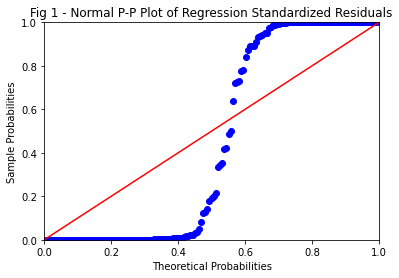

In [55]:
probplot = sm.ProbPlot(ad_train_1.resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

Text(0, 0.5, 'Standardized residual values')

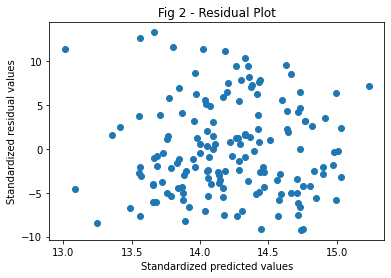

In [56]:
plt.scatter(ad_train_1.fittedvalues, ad_train_1.resid)
plt.title ('Fig 2 - Residual Plot')
plt.xlabel ( "Standardized predicted values")
plt.ylabel( "Standardized residual values")

### Detecting Infulencers

In [57]:
k = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", k, " and number of observations:", n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Number of variables: 6  and number of observations: 157
Cutoff for leverage value:  0.134


In [58]:
from statsmodels.graphics.regressionplots import influence_plot

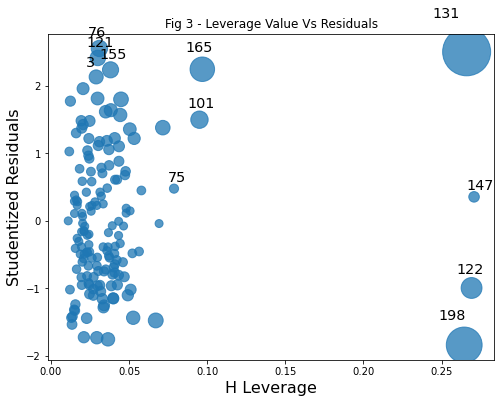

In [61]:
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( ad_train_1, ax = ax )
plt.title( "Fig 3 - Leverage Value Vs Residuals")
plt.show()

### Cook's Distance

C:\Users\rajaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

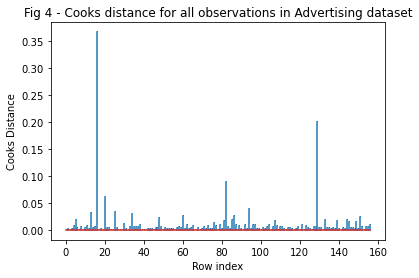

In [62]:
import numpy as np
Sales_influence = ad_train_1.get_influence()
(c, p) = Sales_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Fig 4 - Cooks distance for all observations in Advertising dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance")

In [63]:
ad_df[ad_df.index.isin( [101, 128] )]

,Sno,TV,Radio,Newspaper,Day,Sales
101,102,296.4,36.3,100.9,Weekend,22.1
128,129,220.3,49.0,3.2,Weekdays,14.8


In [64]:
train_X_new1 = train_X.drop( [101], axis = 0)
train_y_new1 = train_y.drop( [101], axis = 0)

In [65]:
train_y = np.sqrt( train_y )

In [66]:
ad_train_2 = sm.OLS(train_y, train_X).fit()
ad_train_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.023  
Dependent Variable: Sales            AIC:                347.1361
Date:               2020-08-12 20:47 BIC:                365.4736
No. Observations:   157              Log-Likelihood:     -167.57 
Df Model:           5                F-statistic:        0.2853  
Df Residuals:       151              Prob (F-statistic): 0.921   
R-squared:          0.009            Scale:              0.51464 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
const           3.3945    0.4529   7.4953  0.0000   2.4997  4.2893
TV              0.0005    0.0010   0.4959  0.6207  -0.0014  0.0024
Radio           0.0013    0.0042   0.3215  0.7482  -0.0069  0.0096
Newspaper      -0.0016    0.0030  -0.5427  0.5882  -0.0075  0.0043
Day_Weekdays    0.2594    0.3928   0.6604  0.5100  -0.5167  1.0355
Day_Weekend     0.2881    0.3790   0.7602  0.4483  -0.4606  1.0368
-----------------------------------------------------------------
Omnibus:              7.172        Durbin-Watson:           2.247
Prob(Omnibus):        0.028        Jarque-Bera (JB):        3.779
Skew:                 0.143        Prob(JB):                0.151
Kurtosis:             2.296        Condition No.:           2056 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

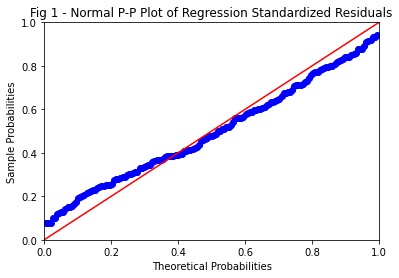

In [67]:
probplot = sm.ProbPlot(ad_train_2.resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

## Prediction

In [68]:
pred_y = np.power( ad_train_2.predict( test_X[train_X.columns] ), 2)

In [69]:
pred_y[0:10]

33     14.713625
80     13.616668
74     14.195130
167    13.900333
111    14.527291
26     13.995396
173    13.862061
64     13.891359
118    13.215092
123    13.980105
dtype: float64

### RMSE

In [70]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

4.605361790155781

In [ ]:
np.round( metrics.r2_score(pred_y, test_y), 2 )